# Solve a Linear System with LU decomposition

In [1]:
import time
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print ("Ready.")

Ready.


### Compute the speedups of using LUD in solving a Linear System

In [2]:
ds = [10,100,200,300,500,1000,2000,5000,10000]

In [5]:
speedups = []
for d in ds:
    n_trial = 5
    As = [np.random.randn(d,d)]*n_trial # fix A matrix
    bs = [np.random.randn(d) for _ in range(n_trial)]
    xs_solve = []
    t_start = time.time()
    for A,b in zip(As,bs):
        x_solve = np.linalg.solve(A,b)
        xs_solve.append(x_solve)
    esec_solve = time.time() - t_start
    print ("np.linalg.solve took [%.3e]"%(esec_solve))
    t_start = time.time()
    for A in As:
        lu, piv = la.lu_factor(A)
    esec_lu = time.time() - t_start
    print ("la.lu_factor took [%.3e]"%(esec_lu))
    t_start = time.time()
    err_sum = 0
    for b_idx,b in enumerate(bs):
        x_lu_solve = la.lu_solve((lu, piv), b)
        err = np.linalg.norm(xs_solve[b_idx]-x_lu_solve)
        err_sum += err
    err_avg = err_sum / len(bs)
    esec_lusolve = time.time() - t_start
    speedup = esec_solve/esec_lusolve
    print ("la.lu_solve took [%.3e]. It is [%.1f] faster. err_avg:[%.3f]"%
           (esec_lusolve,speedup,err_avg))
    speedups.append(speedup)
print ("Done.")

np.linalg.solve took [1.411e-04]
la.lu_factor took [9.062e-03]
la.lu_solve took [3.469e-04]. It is [0.4] faster. err_avg:[0.000]
np.linalg.solve took [6.459e-03]
la.lu_factor took [1.946e-03]
la.lu_solve took [8.171e-04]. It is [7.9] faster. err_avg:[0.000]
np.linalg.solve took [1.696e-02]
la.lu_factor took [4.433e-03]
la.lu_solve took [7.830e-04]. It is [21.7] faster. err_avg:[0.000]
np.linalg.solve took [2.643e-02]
la.lu_factor took [5.252e-03]
la.lu_solve took [8.209e-04]. It is [32.2] faster. err_avg:[0.000]
np.linalg.solve took [4.489e-02]
la.lu_factor took [1.177e-02]
la.lu_solve took [1.211e-03]. It is [37.1] faster. err_avg:[0.000]
np.linalg.solve took [8.129e-02]
la.lu_factor took [4.481e-02]
la.lu_solve took [3.013e-03]. It is [27.0] faster. err_avg:[0.000]
np.linalg.solve took [3.308e-01]
la.lu_factor took [3.095e-01]
la.lu_solve took [2.128e-02]. It is [15.5] faster. err_avg:[0.000]
np.linalg.solve took [3.363e+00]
la.lu_factor took [4.357e+00]
la.lu_solve took [1.408e-01].

### Plot number of equation vs. speedups

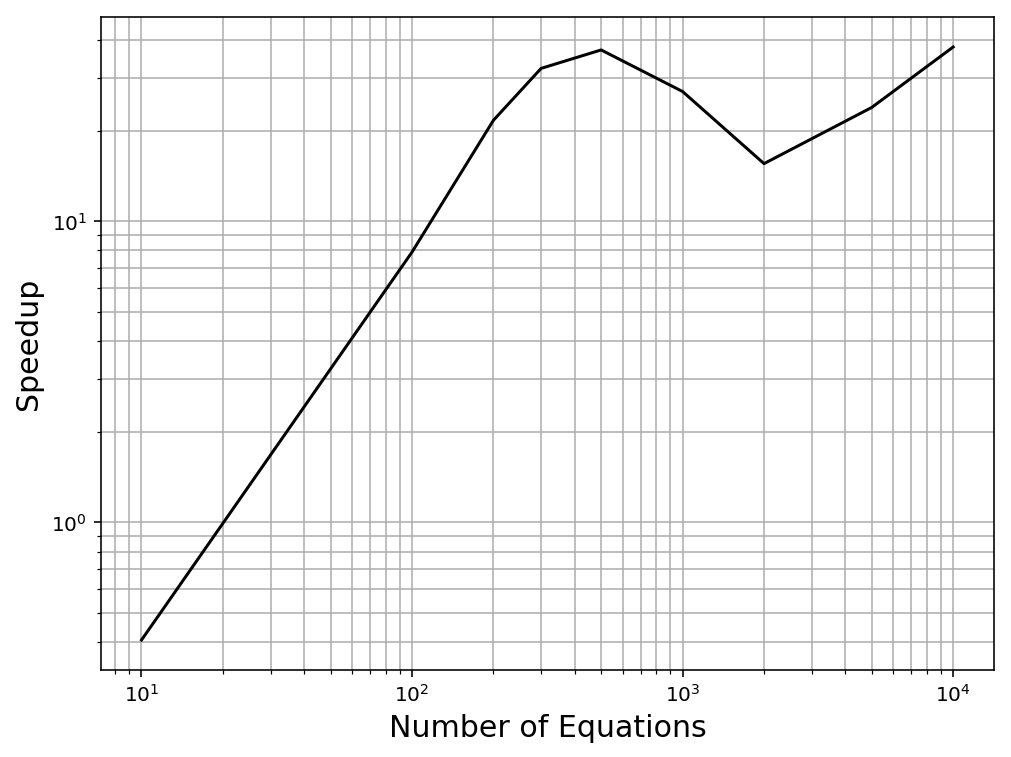

In [7]:
plt.figure(figsize=(8,6))
plt.loglog(ds,speedups,'k-')
plt.xlabel("Number of Equations",fontsize=15)
plt.ylabel("Speedup",fontsize=15)
plt.grid(True, which="both", ls="-")
plt.show()